# Task 1: PI PICO PWM Exercises

### 1a - Basics

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from glob import glob

cmap = cm.get_cmap('viridis')
plt.rcParams.update({'font.size': 14})

/tmp/ipykernel_1845292/4121011056.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


In [2]:
dataPaths = glob("../data/pwmTests/*")

constantFrequencyPaths = [path for path in dataPaths if "f1000" in path]
constantDutyPaths = [path for path in dataPaths if "duty50" in path]

constantFrequencyPaths.sort()
constantDutyPaths.sort()

# Fix path sorting... moving first element to end
constantFrequencyPaths.append(constantFrequencyPaths.pop(0))
constantDutyPaths.append(constantDutyPaths.pop(0))

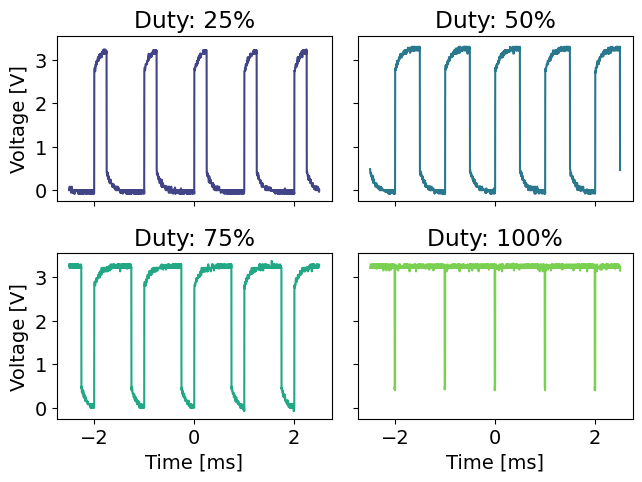

In [3]:
# Plotting changes in duty while keeping frequency=1000 Hz constant
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes = axes.flatten()

# Evenly spaced colours in contrast
colours = np.linspace(.2, .8, len(constantFrequencyPaths))

for i, path in enumerate(constantFrequencyPaths):

    # Isolating the duty percentage from path
    duty = path.split("_")[-1]
    duty = duty[4:-4]
    
    data = np.loadtxt(path, skiprows=2, delimiter=",")

    axes[i].plot(data[:,0] * 1000, data[:,1], color=cmap(colours[i]))
    axes[i].set_title(f"Duty: {duty}%")

plt.tight_layout()
axes[2].set_xlabel("Time [ms]")
axes[3].set_xlabel("Time [ms]")
axes[0].set_ylabel("Voltage [V]")
axes[2].set_ylabel("Voltage [V]");

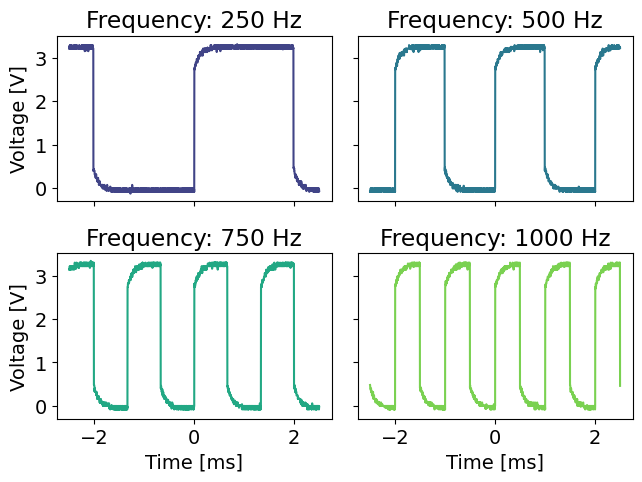

In [4]:
# Plotting changes in frequency while keeping duty=50% constant
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes = axes.flatten()

# Evenly spaced colours in contrast
colours = np.linspace(.2, .8, len(constantFrequencyPaths))

for i, path in enumerate(constantDutyPaths):

    # Isolating the duty percentage from path
    frequency = path.split("_")[-2]
    frequency = frequency[1:]
    
    data = np.loadtxt(path, skiprows=2, delimiter=",")

    axes[i].plot(data[:,0] * 1000, data[:,1], color=cmap(colours[i]))
    axes[i].set_title(f"Frequency: {frequency} Hz")

plt.tight_layout()
axes[2].set_xlabel("Time [ms]")
axes[3].set_xlabel("Time [ms]")
axes[0].set_ylabel("Voltage [V]")
axes[2].set_ylabel("Voltage [V]");

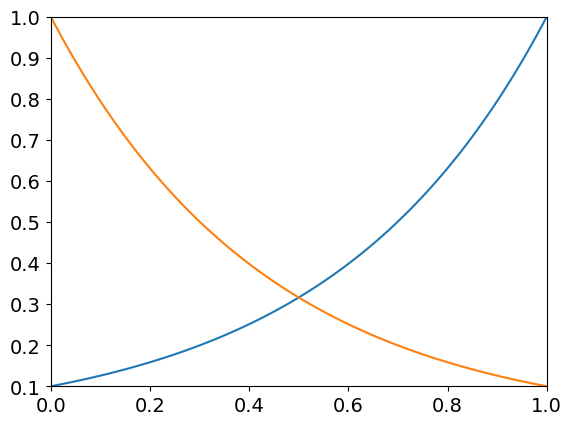

In [13]:
def Increase(x, A):
    return A**x / A

def Decrease(x, A):
    return A**-(x-1) / A

xRange = np.linspace(0, 1, 100)

A=10
increasing = [Increase(x, A) for x in xRange]
decreasing = [Decrease(x, A) for x in xRange]

plt.plot(xRange, increasing)
plt.plot(xRange, decreasing)

plt.margins(0)